# Description
This notebook is showing how Simulation API could be used in a notebook style. The short notebook is displaying how to visualize the report of an already created simulation.

**The simulation is ran on MULTI CPU - MULTI server topology**

In [55]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from collections import namedtuple
import plotly.figure_factory as ff
import numpy as np

In [6]:
url = "http://78.47.131.57:8080"

In [7]:
create_url = url + "/simulation"

In [8]:
report_url = url + '/report'

# Read Report

In [9]:
querystring = {"runtime_id": "fbc68b02391211eab46facde48001122"}

In [41]:
response = requests.request("GET", report_url, params=querystring)
response # should be 200

<Response [200]>

In [42]:
# response.text

In [43]:
report = json.loads(response.text, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))

In [44]:
# report.report

# Visualize Report

In [45]:
def visualize_metrics(data, title="Usage"):
    data_frame = pd.DataFrame(data,
                              columns=["step", "usage", "queue"])
    data_frame = data_frame.groupby(["step"]).max()
    # data_frame.to_csv('rep.csv')

    plt.subplot(2, 1, 1)
    plt.plot(data_frame["usage"])
    plt.title(title)
    plt.margins()
    plt.subplot(2, 1, 2)
    plt.plot(data_frame["queue"])
    plt.title("Requests in queue")
    plt.subplots_adjust(hspace=0.5)
    plt.show()

## Server 1

In [46]:
df_list = []
for server in report.report:
    for component in server.metrics:
        df = pd.DataFrame(component, columns=["step", "cpu_usage", "queue"])
        df_list.append(df)

In [16]:
# df_list

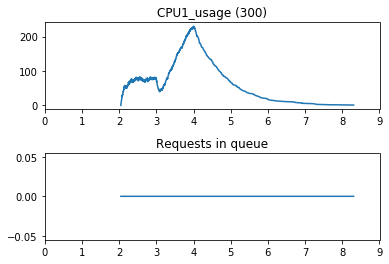

In [17]:
data_frame = df_list[0]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (300)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

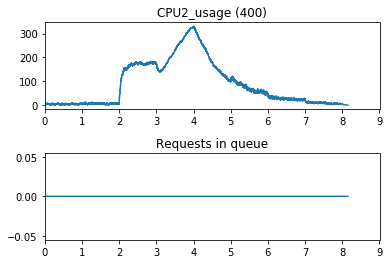

In [32]:
data_frame = df_list[1]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (400)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

# Server 2

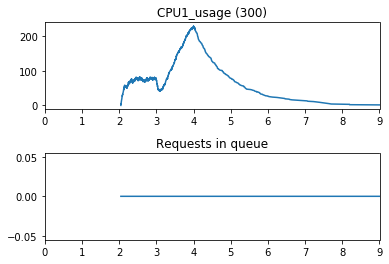

In [33]:
data_frame = df_list[2]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (300)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

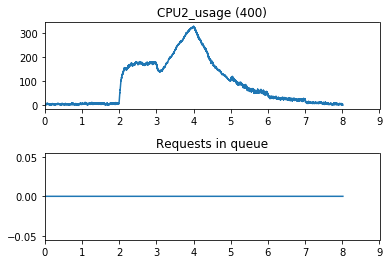

In [34]:
data_frame = df_list[3]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (400)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

# DB Server 

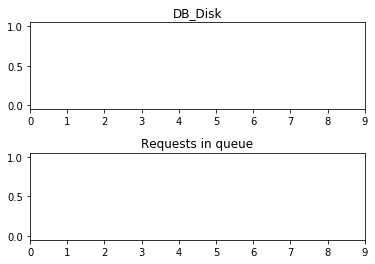

In [35]:
data_frame = df_list[4]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("DB_Disk")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

# Plotly

In [66]:
data_frame1 = df_list[0]
data_frame1 = data_frame1.groupby(["step"]).max()
data_frame1['component'] = ['CPU 1'] * len(data_frame1)

data_frame2 = df_list[1]
data_frame2 = data_frame2.groupby(["step"]).max()
data_frame2['component'] = ['CPU 2'] * len(data_frame2)

In [67]:
frames = [data_frame1, data_frame2]
result = pd.concat(frames)
result.head()

,cpu_usage,queue,component
step,,,
2.047676,0,0,CPU 1
2.047712,1,0,CPU 1
2.048219,2,0,CPU 1
2.048782,3,0,CPU 1
2.051810,4,0,CPU 1


In [68]:
x1 = data_frame1['cpu_usage'].values
x2 = data_frame2['cpu_usage'].values

group_labels = ['CPU 1', 'CPU 2']

fig = ff.create_distplot([x1,x2], group_labels, bin_size=.2)

# Add title
fig.update_layout(title_text='Server 1')
fig.show()

In [60]:
data_frame1['cpu_usage'].values[1:100]

array([ 1,  2,  3,  4,  5,  6,  7,  6,  7,  8,  9, 10, 11, 12, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 22, 23, 24, 25, 26, 25, 26,
       27, 26, 27, 28, 27, 28, 27, 28, 29, 28, 29, 28, 29, 28, 27, 28, 29,
       30, 29, 30, 31, 32, 31, 32, 31, 32, 33, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 40, 41, 42, 43, 44, 43, 44, 45, 46, 47, 46, 45, 46, 47,
       46, 47, 48, 49, 50, 51, 52, 53, 52, 53, 52, 53, 54, 55])